In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit
#from scipy.interpolate import interp1d
#from angle_accomodation import AngleAnnotation

In [2]:
masa_1 = [30,30,50,30,30]
angulo_1 = [0,0,45,45,60]
masa_2 = [30,50,30,30,30]
angulo_2 = [90,90,180,135,120]
masa_3 =[43.2,58.3,35.4,43.2,53.4]
angulo_3 = [224,239,261,266,270]

In [3]:
tabla = pd.DataFrame({'Medida': ['1', '2', '3', '4', '5'], 'Masa 1 (g)': masa_1, 'Ángulo 1 (°)': angulo_1, 'Masa 2 (g)': masa_2, 'Ángulo 2 (°)': angulo_2, 'Masa 3 (g)': masa_3, 'Ángulo 3 (°)': angulo_3})
tabla

,Medida,Masa 1 (g),Ángulo 1 (°),Masa 2 (g),Ángulo 2 (°),Masa 3 (g),Ángulo 3 (°)
0,1,30,0,30,90,43.2,224
1,2,30,0,50,90,58.3,239
2,3,50,45,30,180,35.4,261
3,4,30,45,30,135,43.2,266
4,5,30,60,30,120,53.4,270


In [4]:
def fuerza(m):
    f = m*(9.8)
    return f

f_1 = [fuerza(masa_1[0]), fuerza(masa_2[0]), fuerza(masa_3[0])]
f_2 = [fuerza(masa_1[1]), fuerza(masa_2[1]), fuerza(masa_3[1])]
f_3 = [fuerza(masa_1[2]), fuerza(masa_2[2]), fuerza(masa_3[2])]
f_4 = [fuerza(masa_1[3]), fuerza(masa_2[3]), fuerza(masa_3[3])]
f_5 = [fuerza(masa_1[4]), fuerza(masa_2[4]), fuerza(masa_3[4])]

In [5]:
tabla_fuerza = pd.DataFrame({'Medida': ['1', '2', '3', '4', '5'], 'Fuerza 1 (N)': [f_1[0], f_2[0], f_3[0], f_4[0], f_5[0]], 'Fuerza 2 (N)': [f_1[1], f_2[1], f_3[1], f_4[1], f_5[1]], 'Fuerza 3 (N)': [f_1[2], f_2[2], f_3[2], f_4[2], f_5[2]]})
tabla_fuerza

,Medida,Fuerza 1 (N),Fuerza 2 (N),Fuerza 3 (N)
0,1,294.0,294.0,423.36
1,2,294.0,490.0,571.34
2,3,490.0,294.0,346.92
3,4,294.0,294.0,423.36
4,5,294.0,294.0,523.32


In [6]:
def masa_teorica_seno(m1,m2,a1,a2,a3):
    m_terorica= -((m1*np.sin(np.radians(a1)))+(m2*np.sin(np.radians(a2))))/np.sin(np.radians(a3))
    return m_terorica

def masa_teorica_coseno(m1,m2,a1,a2,a3):
    m_terorica= ((m1*np.cos(np.radians(a1)))+(m2*np.cos(np.radians(a2)))/np.cos(np.radians(a3)))
    return m_terorica

def error(m_real, m_teorica):
    error = (abs(m_real-m_teorica)/m_teorica)*100
    return error

In [7]:
m_3_teo = [masa_teorica_seno(masa_1[0],masa_2[0],angulo_1[0],angulo_2[0],angulo_3[0]), masa_teorica_seno(masa_1[1],masa_2[1],angulo_1[1],angulo_2[1],angulo_3[1]), masa_teorica_seno(masa_1[2],masa_2[2],angulo_1[2],angulo_2[2],angulo_3[2]), masa_teorica_seno(masa_1[3],masa_2[3],angulo_1[3],angulo_2[3],angulo_3[3]), masa_teorica_seno(masa_1[4],masa_2[4],angulo_1[4],angulo_2[4],angulo_3[4])]

error_3 = [error(masa_3[0],m_3_teo[0]), error(masa_3[1],m_3_teo[1]), error(masa_3[2],m_3_teo[2]), error(masa_3[3],m_3_teo[3]), error(masa_3[4],m_3_teo[4])]

tabla_error = pd.DataFrame({'Medida': ['1', '2', '3', '4', '5'], 'Masa experimental (g)': masa_3 ,'Masa teórica 3 (g)': m_3_teo, 'Error (%)': error_3})
tabla_error

,Medida,Masa experimental (g),Masa teórica 3 (g),Error (%)
0,1,43.2,43.186696,0.030805
1,2,58.3,58.331670,0.054293
2,3,35.4,35.796048,1.106401
3,4,43.2,42.530008,1.575340
4,5,53.4,51.961524,2.768348


Incertidumbre de las fuerzas:
Para calcular la incertidumbre de las fuerzas recordemos el error de medida de la báscula que se utilizo para realizar las medidas correspondientes de las masas en el experimento:
$$\sigma_{1}=0.1g$$
Ahora, si tenemos en cuenta que la ecuación de la fuerza $\vec{F}=ma$ donde $m$ actua como nuestra variable independiente y $g$ es la gravedad que es una constante en la ecuación, podemos utilizar uno de los calculos simple de la incertidumbre de una medida:
$$\Delta Y = |c|\Delta X$$
lo que nos da el resultado expuesto más adelante donde también tenemos en cuenta que el error instrumental aplica para todas las medidas por lo tanto la incertidumbre es la misma para todos.

In [17]:
def incertidumbre_fuerza(m):
    incer = np.absolute(m)*9.8
    return incer
incertidumbre_masa = 0.1
incertidumbre_fuerzas = incertidumbre_fuerza(incertidumbre_masa)
incertidumbre_fuerzas

np.float64(0.9800000000000001)

Por lo tanto $\Delta \vec{F} = 0.98$

Ahora, para la incertidumbre de la masa teórica, se tiene que:
$$    
\Delta m_{teórica} = \sqrt{\left(\frac{\partial m_{teórica}}{\partial m_1}\Delta m_1\right)^2 + \left(\frac{\partial m_{teórica}}{\partial m_2}\Delta m_2\right)^2 + \left(\frac{\partial m_{teórica}}{\partial \theta_1}\Delta \theta_1\right)^2 + \left(\frac{\partial m_{teórica}}{\partial \theta_2}\Delta \theta_2\right)^2 + \left(\frac{\partial m_{teórica}}{\partial \theta_3}\Delta \theta_3\right)^2}\\
$$

donde, al calcular las derivadas parciales sabemos que:
$$
\frac{\partial M_3}{\partial M_1} = \frac{cos(\theta_1)}{cos(\theta_2)}
\quad , \quad
\frac{\partial M_3}{\partial M_2} = \frac{cos{\theta_2}}{\theta_3}
\quad , \quad
\frac{\partial M_3}{\partial \theta_1}= \frac{-M_1sen(\theta_1)}{cos(\theta_3)}
\quad , \quad
\frac{\partial M_3}{\partial \theta_2} = \frac{-M_2sen(\theta_2)}{cos(\theta_3)}
$$
$$
\frac{\partial M_3}{\partial \theta_3} = (M_1cos(\theta_1)+M_2cos(\theta_2))\left( \frac{sen(\theta_3)}{cos^2(\theta_3)} \right)
$$


In [8]:
def add_vector_labels(ax, angles, magnitudes, labels, colors):
    for angle, magnitude, label, color in zip(angles, magnitudes, labels, colors):
        ax.quiver(0, 0, np.radians(angle), magnitude, color=color, scale=1, scale_units='xy', angles='xy', width=0.013, headwidth=4)
        if angle == 0:
            ax.text(np.radians(angle), magnitude+140, label, color='black', fontsize=20, ha='right', va='bottom')
        elif angle == 180:
            ax.text(np.radians(angle), magnitude+140, label, color='black', fontsize=20, ha='left', va='bottom')
        elif angle > 180 and angle < 271:
            ax.text(np.radians(angle+20), magnitude+70, label, color='black', fontsize=20, ha='right', va='bottom')
        elif angle > 90:
            ax.text(np.radians(angle), magnitude+70, label, color='black', fontsize=20, ha='left', va='bottom')
        else:
            ax.text(np.radians(angle), magnitude+40, label, color='black', fontsize=20, ha='right', va='bottom')


In [9]:
def angulos_vector(ax,angulos):
    l = 100
    for i in zip(angulos):
        an = np.arange(0, np.radians(i).item(),0.1)
        ban = np.repeat(l,np.size(an))
        ax.plot(an , ban, color='black', linestyle='-', linewidth=0.8)
        l= l+100

In [10]:
def formato_grafica(ax):
    ax.set_theta_direction(1)
    ax.set_theta_zero_location('E')
    ax.set_ylim(0, 600)
    ax.set_yticklabels([])
    ax.tick_params(axis='x',labelsize=8, length=0)
    ax.plot(0, 1, color='black', marker='o', markersize=7)
    ax.grid(True, linestyle=':', linewidth=0.5)

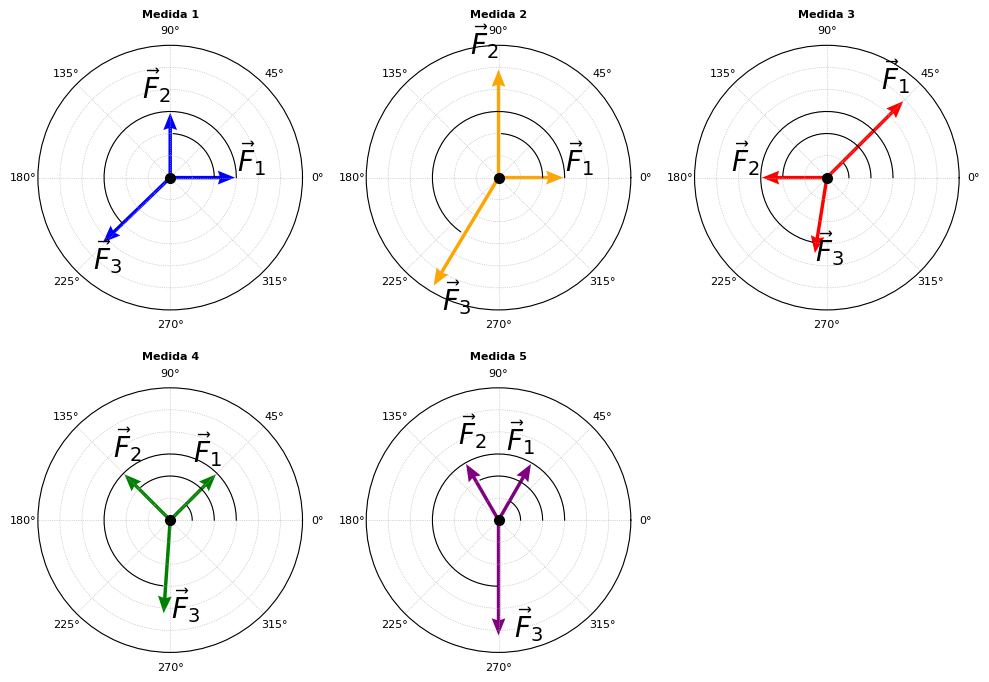

In [11]:
fig = plt.figure(figsize=(10, 7), layout='tight')

spec = fig.add_gridspec(2,3)

ax1 = fig.add_subplot(spec[0,0], projection='polar')
ax1.set_title('Medida 1',size = 8, weight = 'bold')
formato_grafica(ax1)
angulos_vector(ax1,[angulo_1[0], angulo_2[0], angulo_3[0]])  
add_vector_labels(ax1, [angulo_1[0], angulo_2[0], angulo_3[0]], f_1, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['blue', 'blue', 'blue'])

ax2 = fig.add_subplot(spec[0,1], projection='polar')
ax2.set_title('Medida 2',size = 8, weight = 'bold')
formato_grafica(ax2)
angulos_vector(ax2,[angulo_1[1], angulo_2[1], angulo_3[1]])
add_vector_labels(ax2, [angulo_1[1], angulo_2[1], angulo_3[1]], f_2, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['orange', 'orange', 'orange'])

ax3 = fig.add_subplot(spec[0,2], projection='polar')
ax3.set_title('Medida 3',size = 8, weight = 'bold')
formato_grafica(ax3)
angulos_vector(ax3,[angulo_1[2], angulo_2[2], angulo_3[2]])
add_vector_labels(ax3, [angulo_1[2], angulo_2[2], angulo_3[2]], f_3, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['red', 'red', 'red'])

ax4 = fig.add_subplot(spec[1,0], projection='polar')
ax4.set_title(r'''Medida 4''',size = 8, weight = 'bold')
formato_grafica(ax4)
angulos_vector(ax4,[angulo_1[3], angulo_2[3], angulo_3[3]])
add_vector_labels(ax4, [angulo_1[3], angulo_2[3], angulo_3[3]], f_4, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['green', 'green', 'green'])

ax5 = fig.add_subplot(spec[1,1], projection='polar')
ax5.set_title(r''' Medida 5 ''',size = 8, weight = 'bold')
formato_grafica(ax5)
angulos_vector(ax5,[angulo_1[4], angulo_2[4], angulo_3[4]])
add_vector_labels(ax5, [angulo_1[4], angulo_2[4], angulo_3[4]], f_5, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['purple', 'purple', 'purple'])
plt.savefig('capturas_experimentales_primera_ley.png', dpi = 300, bbox_inches = 'tight')
plt.show()